# SD701 Lab session: classification and clustering

The goal of this lab session is for you to get a good grasp of data cleaning, clustering, classification implementations and evaluations. For this reason, the lab is less focused on re-implementing existing algorithms, and more onto using what is already available and making sense of it.

Let us make our imports.

In [78]:
import sklearn as sk
import numpy as np
from sklearn import cluster
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

## The Palmer Penguin dataset

Let us look at the [Palmer penguins]() dataset. It is a small dataset that contains measurements about real-world penguins.

Our task is to:

   - Do an exploratory analysis of the data
   - Think about what algorithms and features we want to use, and how we need to transform our variables
   - Run our algorithms and evaluate them

In [2]:
penguins_cs = pd.read_csv(open("data/penguins_size.csv"))

### Exploratory analysis

In [3]:
penguins_cs

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
penguins_cs.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

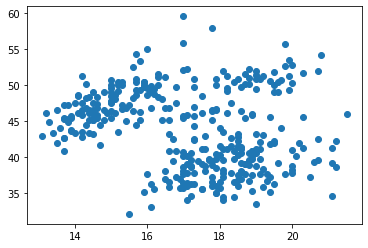

In [9]:
x = penguins_cs['culmen_depth_mm']
y = penguins_cs['culmen_length_mm']
plt.plot(x, y, 'o')

<AxesSubplot:>

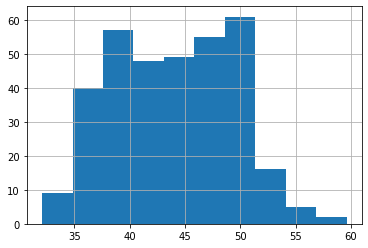

In [10]:
penguins_cs['culmen_length_mm'].hist()

### Learning on our dataset

#### Clustering

As you can see, this data is not readily adapted for clustering: many of the variables are non-numerical. We could try different strategies:

   - Getting rid of all non numerical variables
   - Converting categorical variables to a [one-hot vector](https://en.wikipedia.org/wiki/One-hot) to use them
   
We will try both approaches. Below is the code for the first approach, the second is yours to write. You can also update the first approach to fill n/a values with something better than $0$.

In [11]:
penguins_num = penguins_cs[['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
penguins_num = penguins_num.fillna(0) #remplacer toutes les valeurs N/A par 0

In [12]:
penguins_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,0.0,0.0,0.0,0.0
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,0.0,0.0,0.0,0.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


#### $k$-means

Let us focus on the $k$-means clustering algorithm. Once trained, the labels (_i.e._ the cluster assignation) is in `kmeans_algo.labels_`, and the centroids are in `kmeans_algo.cluster_centers_`.

In [15]:
kmeans_algo = cluster.KMeans(n_clusters=3)
kmeans_results = kmeans_algo.fit_transform(penguins_num)

In [16]:
kmeans_algo.cluster_centers_

array([[  40.4337931 ,   17.69241379,  186.7862069 , 3407.93103448],
       [  48.61111111,   15.40123457,  219.95061728, 5359.87654321],
       [  44.24491525,   17.39661017,  201.80508475, 4311.01694915]])

In [100]:
type(penguins_num.to_numpy())

numpy.ndarray

In [101]:
type(kmeans_algo.cluster_centers_)

numpy.ndarray

In [17]:
kmeans_algo.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2,

Plot the data with colours for each cluster (in two dimensions).

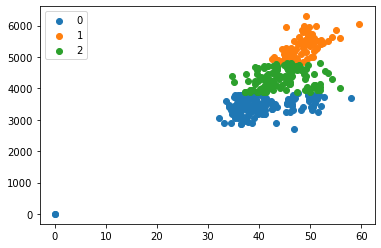

In [55]:
nblabels = np.unique(kmeans_algo.labels_)
for i in nblabels:
    tmp = penguins_num[kmeans_algo.labels_==i]
    plt.scatter(tmp['culmen_length_mm'],tmp['body_mass_g'],label=i)
plt.legend()
plt.show()


**Finding the right $k$ with the elbow method**

Let us find the most appropriate value for $k$ using the "elbow" method. It consists in plotting, for multiple values of $k$, the global clustering score. While in theory the score can be anything you want, for today let us use the _distortion_. For a cluster $C$ with centroid $c$ and points $(x^{c}_i)_{i=0}$, its distortion $d(c)$ is the sum of the squared distances between the points and the centroid:

$$
    d(c) = \sum_i |x_i - c|^2,
$$

and the distortion of our $k$ clusters is the sum of distortions for each cluster. You can fill the list `elbow_scores` with the scores you will have computed.

Text(0, 0.5, 'Distortion')

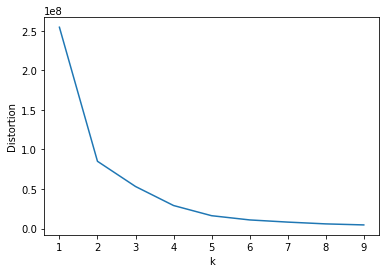

In [110]:
def distortion(data, clustering):
    distortion = 0.0
    clustering.fit(data)
    for i in range(0,len(clustering.cluster_centers_)):
        datai = data[clustering.labels_==i].to_numpy()
        for j in range(len(datai)):
            distance = (datai[j,:]-clustering.cluster_centers_[i,:])**2
            distortion = distortion + np.linalg.norm(distance)
    return distortion

min_k = 1
max_k = 10
elbow_scores = [distortion(penguins_num,cluster.KMeans(n_clusters=i)) for i in range(min_k,max_k)]

# Write code here

plt.plot(list(range(min_k, max_k)), elbow_scores)
plt.xlabel("k")
plt.ylabel("Distortion")

#### Classification

While we have not seen any classification algorithms in class yet, let us try to classify (instead of cluster) our data. The code for the classification algorithm is already completely written out for you, so you can focus on the other tasks.

Start by choosing what you want to classify on (for example, the species). You can use the exploratory data analysis you did before to guide your choice.

In [130]:
len(penguins_num)
penguins_cs.loc[:,penguins_cs.columns != 'species'].iloc[340:]

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [222]:
def train_test_split(data: pd.DataFrame, target_key:str, percent_test: int =15):
    # Write code here
    
    nb_data = len(pd.Dataframe)
    nb_train = round(nb_data*(1-percent_test))
    nb_test = nb_data - nb_train
    
    X_train = penguins_cs.loc[:,penguins_cs.columns != 'species'].iloc[:nb_train]
    y_train = pd.[target_key].iloc[:nb_train]
    
    X_test = penguins_cs.loc[:,penguins_cs.columns != 'species'].iloc[nb_train:]
    y_test = pd.[target_key].iloc[nb_train:]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(data, target_key="species")

Check that your train and test set are appropriate. For example, is the repartition of the target variable similar? If not, how could you correct this issue?

In [216]:
# Simple random forest code
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.predict(X_test)

array([1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 0, 0, 1])

## Evaluation

Now it is time to focus on the evaluation of our models. Let us use this as an opportunity to compare the clustering and classification approaches.

   - How can we evaluate the quality of the clustering? Think about the ranking agreement metrics we saw in the first lecture
   - Can we look at the confusion matrix outputted by our classification algorithm?
   - How can we evaluate the quality of the classification? You can go read again about the F1-score and ROC curves

## Implementing DBScan

For the last part of the lab, let us focus a little bit on implementation. Your goal is to reimplement a functional version of the [DBScan algorithm]() that we saw during the lecture. You will find below a skeleton of code that you can fill in.

Once you have a functional version (if you still have time), you can try to make your implementation faster, by thinking about the following questions:

   - Can the neighbourhood lookup be faster?
   - Can the $\mu$ parameter be implemented easily?
   - How can the scalability of the algorithm be tested?

In [104]:
def dbscan(data: pd.DataFrame, epsilon: float, mu:int =1):
    clusters = [] # This list will contain the cluster number for each data point
    
    
    return clusters